In [3]:
from pyspark.ml.classification import GBTClassificationModel
from google.cloud import storage

In [2]:
bucket_name = 'new_bigdata_nifty50'

In [5]:
gbtModel = GBTClassificationModel.load('gs://{}//models//gbtModel'.format(bucket_name))

In [6]:
gbtModel.featureImportances

SparseVector(201, {0: 0.0, 1: 0.0002, 2: 0.0094, 3: 0.0005, 4: 0.0069, 5: 0.0003, 7: 0.0006, 8: 0.0016, 9: 0.002, 11: 0.5677, 12: 0.0002, 18: 0.0006, 19: 0.0001, 23: 0.0002, 24: 0.0756, 28: 0.0011, 30: 0.0002, 31: 0.0005, 32: 0.0669, 34: 0.0202, 35: 0.0007, 36: 0.0003, 37: 0.0286, 39: 0.0004, 41: 0.0105, 42: 0.0026, 45: 0.0022, 47: 0.0103, 49: 0.0528, 52: 0.0069, 55: 0.0004, 57: 0.0004, 61: 0.0002, 62: 0.0005, 66: 0.0187, 67: 0.0805, 68: 0.0001, 70: 0.0002, 71: 0.0009, 72: 0.0028, 76: 0.0024, 77: 0.0008, 78: 0.001, 79: 0.0013, 81: 0.0039, 82: 0.0152, 104: 0.0002, 130: 0.0003, 196: 0.0001})

In [7]:
cols = ['company',
 'day',
 'avg(Reverse Repo Rate)',
 'avg(RSI14)',
 'avg(Car Registrations)',
 'avg(CCI10)',
 'avg(TRIMA10)',
 'avg(SAR)',
 'avg(fastdsr)',
 'avg(ADX20)',
 'avg(WILLR)',
 'avg(sma10)',
 'avg(macd1226)',
 'avg(sma20)',
 'avg(ema15)',
 'avg(ema10)',
 'avg(KAMA10)',
 'avg(TRIMA20)',
 'avg(Tourist Arrivals)',
 'avg(fastksr)',
 'avg(Steel Production)',
 'avg(Gross National Product)',
 'avg(TRIMA5)',
 'avg(macd1020)',
 'avg(CCI5)',
 'avg(MOM15)',
 'avg(Export Prices)',
 'avg(TYPPRICE)',
 'avg(GDP per Capita PPP)',
 'avg(HT_DCPERIOD)',
 'avg(ema5)',
 'first(sector)',
 'avg(open)',
 'avg(Producer Prices)',
 'avg(PPO)',
 'avg(ADX10)',
 'avg(CCI15)',
 'avg(Fiscal Expenditure)',
 'avg(Import Prices)',
 'avg(ATR)',
 'avg(Crude Oil Production)',
 'avg(upperband)',
 'avg(low)',
 'avg(BETA)',
 'avg(ROC20)',
 'avg(macd520)',
 'avg(date)',
 'avg(MOM10)',
 'avg(fastk)',
 'avg(MFI)',
 'avg(Corporate Tax Rate )',
 'avg(APO)',
 'avg(sma5)',
 'avg(KAMA20)',
 'avg(RSI8)',
 'avg(macd510)',
 'avg(lowerband)',
 'avg(Military Expenditure)',
 'avg(sma15)',
 'avg(fastd)',
 'avg(ADX5)',
 'avg(slowd)',
 'avg(ema20)',
 'avg(Consumer Price Index)',
 'avg(Industrial Production)',
 'avg(KAMA30)',
 'avg(GDP)',
 'avg(Bank Lending Rate)',
 'avg(Trange)',
 'avg(MOM20)',
 'avg(Balance of Trade)',
 'avg(HT_TRENDLINE)',
 'avg(ULTOSC)',
 'avg(Inflation Rate )',
 'avg(ROC5)',
 'avg(close)',
 'avg(Food Inflation)',
 'avg(middleband)',
 'avg(ROC10)',
 'avg(volume)',
 'avg(macd1520)',
 'avg(high)',
 'avg(slowk)',
 'diffOpenClose',
 'diffHighLow',
 'label',
 'companyIdx',
 'sectorIdx',
 'companyVec',
 'sectorVec',
 'features']

In [13]:
import pandas as pd
gbt_FI = pd.DataFrame.from_records(list(zip(cols, gbtModel.featureImportances)), columns =['Feature', 'Importance'])

In [14]:
gbt_FI

,Feature,Importance
0,company,0.000001
1,day,0.000237
2,avg(Reverse Repo Rate),0.009427
3,avg(RSI14),0.000467
4,avg(Car Registrations),0.006922
...,...,...
86,companyIdx,0.000000
87,sectorIdx,0.000000
88,companyVec,0.000000
89,sectorVec,0.000000


<AxesSubplot:xlabel='Importance', ylabel='Feature'>

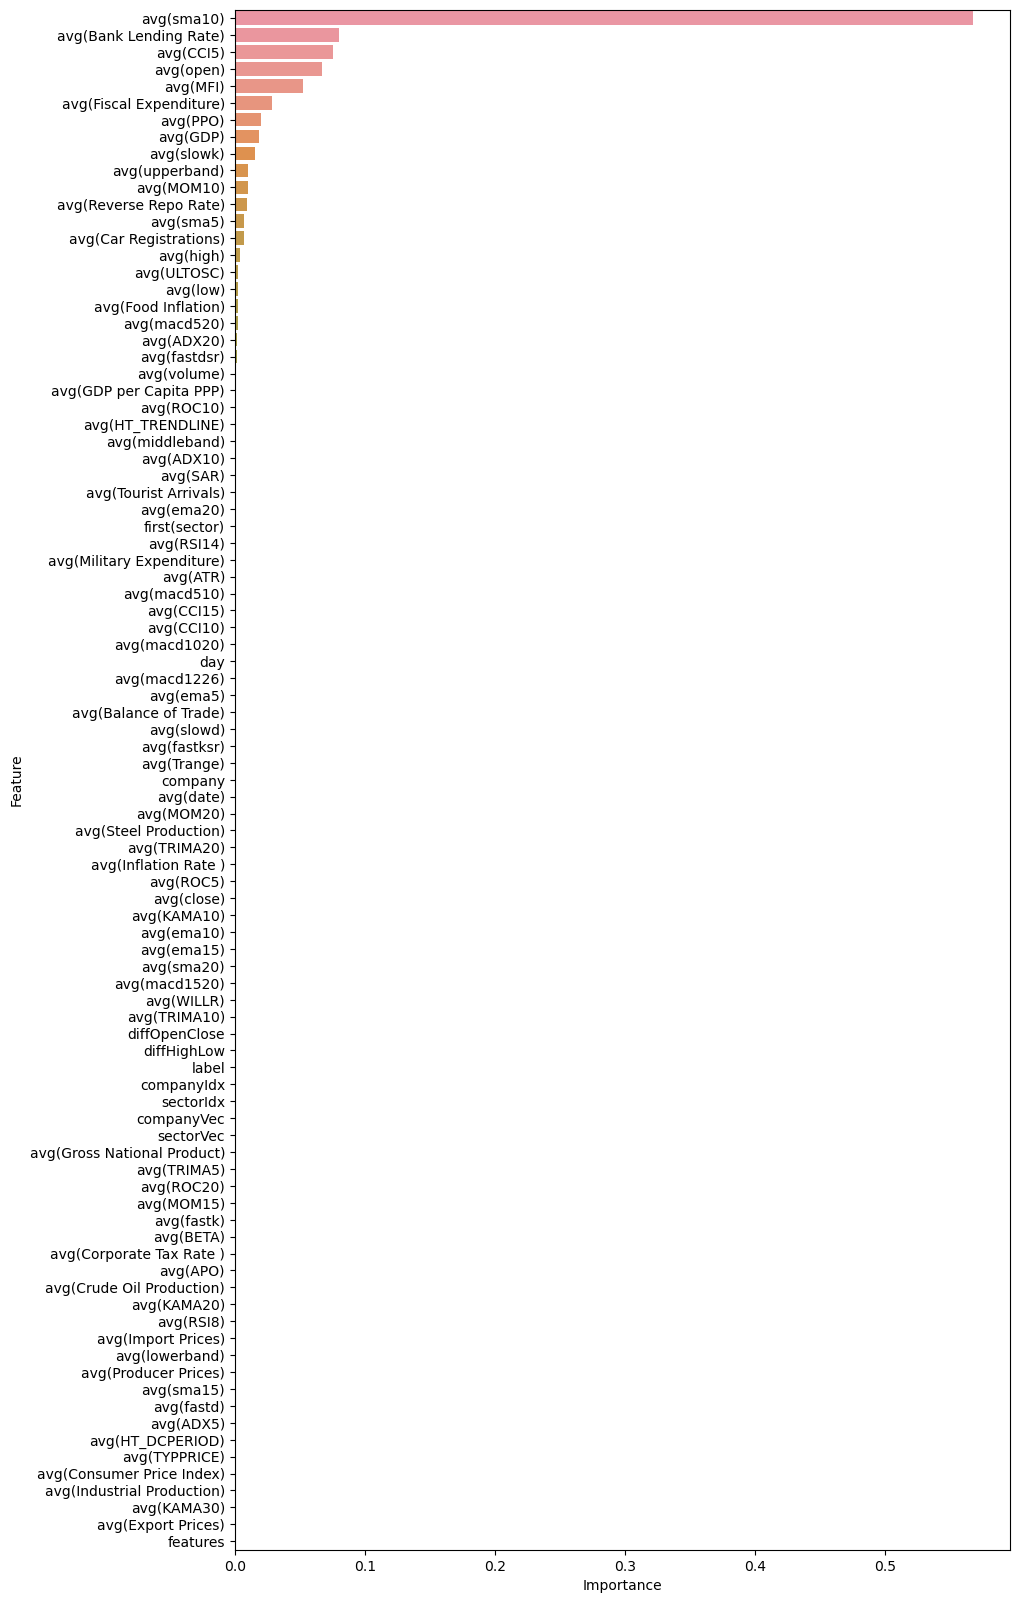

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,20))
sns.barplot(data=gbt_FI.sort_values(by='Importance', ascending=False), y='Feature', x='Importance')

In [22]:
from pyspark.ml.classification import RandomForestClassificationModel

In [25]:
rfModel = RandomForestClassificationModel.load('gs://{}//models//rfModel'.format(bucket_name))

In [26]:
rf_FI = pd.DataFrame.from_records(list(zip(cols, rfModel.featureImportances)), columns =['Feature', 'Importance'])

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

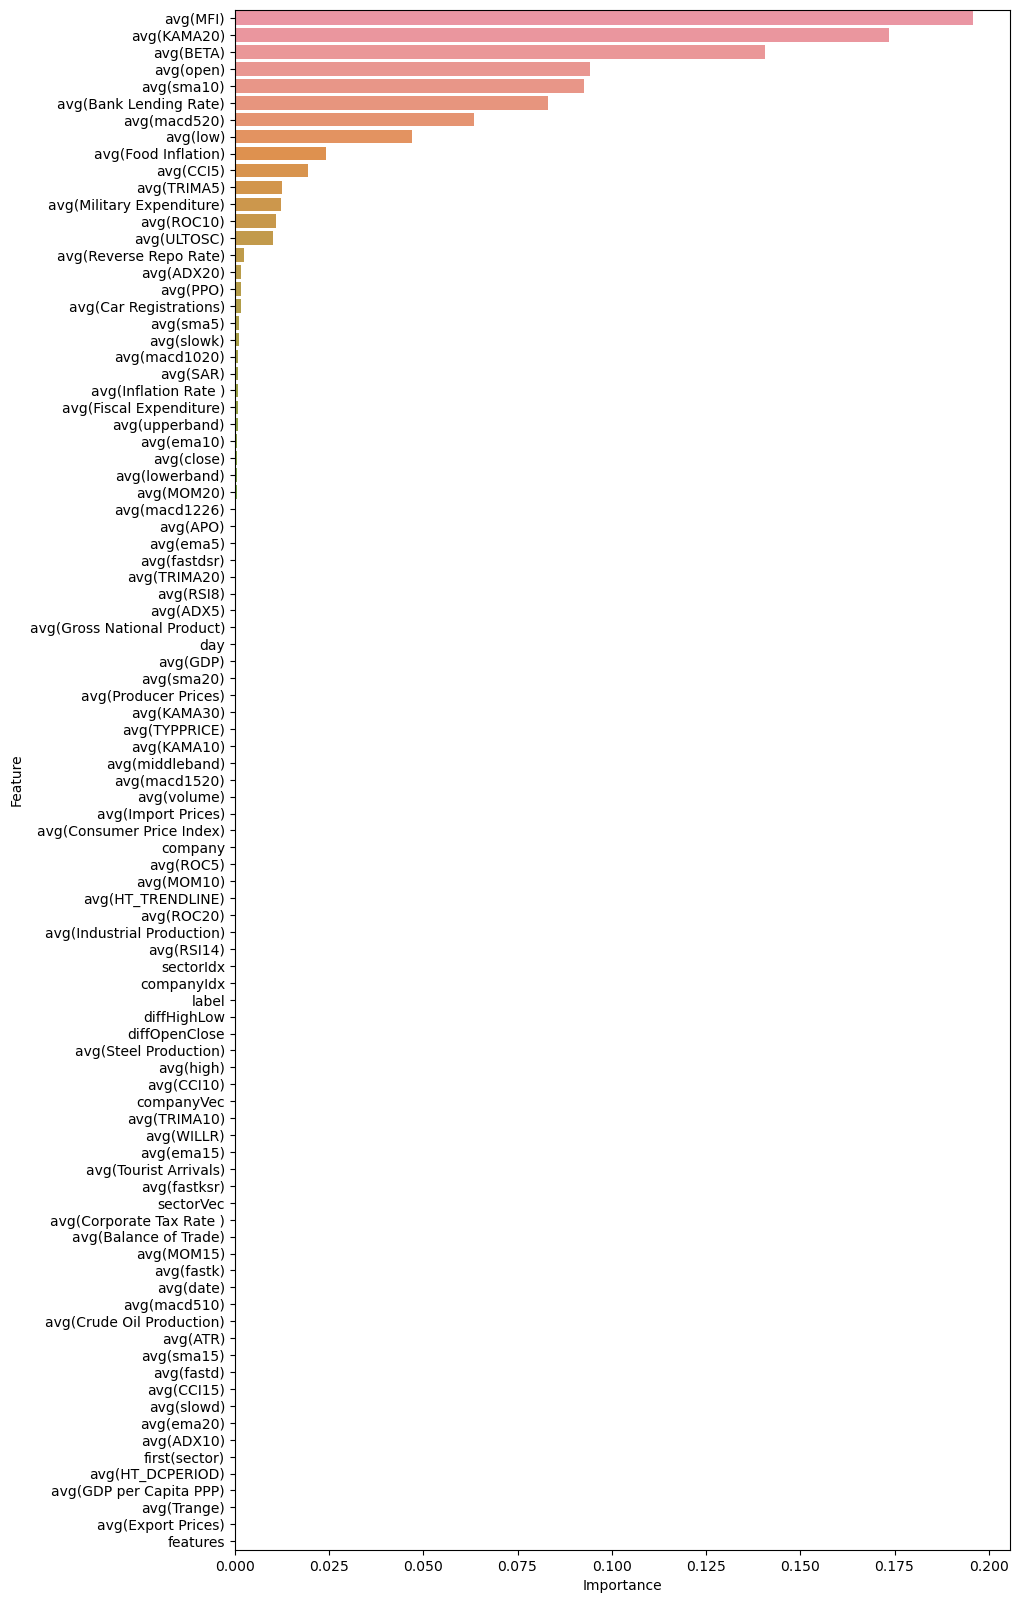

In [27]:
plt.figure(figsize=(10,20))
sns.barplot(data=rf_FI.sort_values(by='Importance', ascending=False), y='Feature', x='Importance')